### BINI Games
Тестовое задание\
На позицію: Product Analyst
Автор работы: Павел Морозов\
morozowi5@gmail.com\
+380979853718
\
\
Спасибо за задание!\
Оно было интересным!\
Надеюсь мой формат не будет минусом и надеюсь, что главная цель задания - не идеальный вид, а именно показать свои навыки, процесс мышления.\
Прошу также отнестись с пониманием к тому, что свободного времени у меня сейчас, к сожалению крайне мало.\
На задание я потратил около 4х часов и спешу сдать его, как договаривался на выходных.
Если Формат сдачи являеться неудовлетворительным - я переделаю, но уже в понедельник ночью.\
\
Благодарю за опыт и тренировку скилов, полученные в ходе задания)

# Задание 1

In [3]:
import pandas as pd
import pandasql as ps

autors = pd.read_csv('Data/Task1,2/Autors.csv',  encoding='utf-8')
autors

,book_id,author
0,841,ГВЈГВ­Г™вЂ¦ГВЇ Г™вЂ¦ГВ±ГВ§ГВЇ
1,944,ГВЈГВ­Г™вЂћГВ§Г™вЂ¦ Г™вЂ¦ГВіГВЄГВєГВ§Г™...
2,775,A.S.A. Harrison
3,764,Abbi Glines
4,931,Adam Johnson
...,...,...
777,542,"William Makepeace Thackeray,John Carey"
778,201,William Peter Blatty
779,904,William Styron
780,821,"Yana Toboso,Tomo Kimura"


Видим, что присутствует неверная кодировка

In [4]:
import chardet
with open('Data/Task1,2/Autors.csv', 'rb') as f:
    result = chardet.detect(f.read()) 
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


Алгоритм определил кодировку как 'utf-8' с 99% вероятностью. При импорте стоит 'utf-8'. Это не помогло.\
Я прошерстил сайты определения кодировки - нужную пока не нашёл. Поскольку у меня очень ограничено время, с Вашего позволения перейду к самой задаче.\
Если задача подразумевала заметить и исправить кодировку, из теста видно, что я заметил и предпринял верные шаги, остальное - вопрос времени

In [5]:
book_names = pd.read_csv('Data/Task1,2/Book_names.csv',  encoding='utf-8')
book_names

,book_id,book_name
0,1,Beowulf
1,2,Batman: Year One
2,3,Go Set a Watchman
3,4,When You Are Engulfed in Flames
4,5,Daughter of Smoke & Bone
...,...,...
777,1028,Rapture
778,1033,Disclosure
779,1043,The Left Hand of Darkness
780,1044,Let It Snow: Three Holiday Romances


In [6]:
main_data = pd.read_csv('Data/Task1,2/Main_DATA.csv',  encoding='utf-8')
main_data

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price
0,152082,11.04.2018,692,1,739559,fiction,584
1,323072,11.04.2018,635,1,567502,genre fiction,259
2,472214,11.04.2018,687,1,217135,genre fiction,194
3,505092,11.04.2018,688,1,690951,genre fiction,64
4,505092,11.04.2018,763,1,690951,children,389
...,...,...,...,...,...,...,...
9048,1025568,11.04.2019,639,1,628996,genre fiction,64
9049,1053058,11.04.2019,542,1,596779,genre fiction,64
9050,1053058,11.04.2019,633,1,596779,genre fiction,64
9051,1053058,11.04.2019,689,3,596779,genre fiction,475


В задании сказано:" Используя файлы из папки Task1,2 и гугл таблицы ответить на следующие вопросы"

Предположу, что раз для того, чтоб загрузить в гугл таблицы csv файл - нужно дополнение, например "Coefficient", то в тексте задания речь шла об источнике, а не инструменте.
На всякий случай опишу как бы я это сделал в гугл таблицах.\
- Я бы привязал csv файлы к гугл таблице с помошью Coefficient
- Далле с помошью VLOOKUP() нашёл бы соостветствия айди акниг и привязал бы таблицу авторов и названий книг
- После этого создал бы pivat table

Вместо этого, предлагаю воспользоваться Pandas и сделать всё быстрее и проще (Если нужно всё же в таблицах - я могу переделать)

In [7]:
# Сводим таблицы в одну
df = main_data.merge(autors, on='book_id', how='left').merge(book_names, on='book_id', how='left')
df

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price,author,book_name
0,152082,11.04.2018,692,1,739559,fiction,584,Isaac Asimov,The Foundation Trilogy
1,323072,11.04.2018,635,1,567502,genre fiction,259,Jeff Kinney,The Last Straw
2,472214,11.04.2018,687,1,217135,genre fiction,194,Frank E. Peretti,This Present Darkness
3,505092,11.04.2018,688,1,690951,genre fiction,64,Jessica Sorensen,The Coincidence of Callie & Kayden
4,505092,11.04.2018,763,1,690951,children,389,Christopher Hitchens,God is Not Great: How Religion Poisons Everything
...,...,...,...,...,...,...,...,...,...
9048,1025568,11.04.2019,639,1,628996,genre fiction,64,Tahereh Mafi,"Unravel Me (Shatter Me,#2)"
9049,1053058,11.04.2019,542,1,596779,genre fiction,64,"William Makepeace Thackeray,John Carey",Vanity Fair: A Novel Without a Hero
9050,1053058,11.04.2019,633,1,596779,genre fiction,64,Eowyn Ivey,The Snow Child
9051,1053058,11.04.2019,689,3,596779,genre fiction,475,Lauren Groff,Fates and Furies


<b>1. Какая книга какого автора продалась больше всего раз?</b>

In [10]:
# Добавим столбец revenue
df['revenue'] = df.quantity * df.sale_price

In [24]:
df.head(3)

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price,author,book_name,revenue
0,152082,11.04.2018,692,1,739559,fiction,584,Isaac Asimov,The Foundation Trilogy,584
1,323072,11.04.2018,635,1,567502,genre fiction,259,Jeff Kinney,The Last Straw,259
2,472214,11.04.2018,687,1,217135,genre fiction,194,Frank E. Peretti,This Present Darkness,194


По условиям задачи нас интересует количество продаж, но и на revenue интересно посмотреть

In [83]:
top_books = df[['author', 'book_name', 'quantity', 'revenue']].groupby(['author', 'book_name']).\
    agg({'quantity':'sum', 'revenue':'sum'}).sort_values(by='quantity', ascending=False).reset_index()

top_books

,author,book_name,quantity,revenue
0,Mark Cotta Vaz,New Moon: The Complete Illustrated Movie Compa...,87,62118
1,Joanne Harris,Chocolat,80,33840
2,Cormac McCarthy,Blood Meridian: Or the Evening Redness in the ...,78,26598
3,Stephen King,Skeleton Crew,75,33825
4,Chetan Bhagat,Two States,67,26733
...,...,...,...,...
777,Elizabeth Strout,Olive Kitteridge,1,64
778,"Richard Bachman,Stephen King",Thinner,1,194
779,Richard Carlson,Don't Sweat the Small Stuff,1,499
780,Richard Feynman,"Surely You're Joking,Mr. Feynman! Adventures o...",1,324


<jkmit>

In [76]:
top_books.reset_index().book_name[0]

'New Moon: The Complete Illustrated Movie Companion'

In [77]:
author = top_books.reset_index().author[0]
book = top_books.reset_index().book_name[0]

print(f'Top sales book is - "{book}" by {author}')

Top sales book is - "New Moon: The Complete Illustrated Movie Companion" by Mark Cotta Vaz


Как видим, больше всех продалась книга: "New Moon: The Complete Illustrated Movie Companion" by Mark Cotta Vaz

<b>2. Проанализировать динамику продаж и выручки по жанрам книг</b>

In [84]:
df.groupby(['genre']).\
    agg({'quantity':'sum', 'sale_price':'sum', 'revenue':'sum'}).sort_values(by='revenue', ascending=False).reset_index()

,genre,quantity,sale_price,revenue
0,genre fiction,7787,2159503,2420926
1,nonfiction,1566,491229,564200
2,fiction,505,157590,174071
3,children,314,107864,120235


Продажи и выручка больше всего в жанровой литературе и меньше всего в детской\
Для динамики изобразим жанры на графике


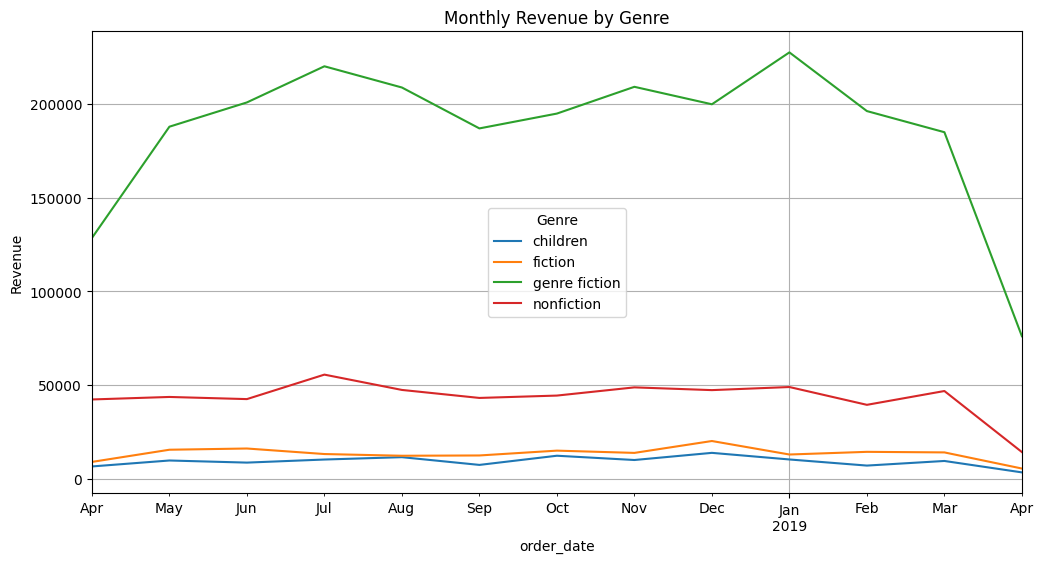

In [87]:
import matplotlib.pyplot as plt

df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

genre_time_data = df.groupby(['genre', pd.Grouper(key='order_date', freq='M')])['revenue'].sum().reset_index()
pivot_data = genre_time_data.pivot(index='order_date', columns='genre', values='revenue').fillna(0)


pivot_data.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Revenue by Genre')
plt.xlabel('order_date')
plt.ylabel('Revenue')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

<b>3. У какого покупателя больше всего покупок, а кто потратил больше всех, что
они покупали</b>

In [88]:
df

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price,author,book_name,revenue
0,152082,2018-04-11,692,1,739559,fiction,584,Isaac Asimov,The Foundation Trilogy,584
1,323072,2018-04-11,635,1,567502,genre fiction,259,Jeff Kinney,The Last Straw,259
2,472214,2018-04-11,687,1,217135,genre fiction,194,Frank E. Peretti,This Present Darkness,194
3,505092,2018-04-11,688,1,690951,genre fiction,64,Jessica Sorensen,The Coincidence of Callie & Kayden,64
4,505092,2018-04-11,763,1,690951,children,389,Christopher Hitchens,God is Not Great: How Religion Poisons Everything,389
...,...,...,...,...,...,...,...,...,...,...
9048,1025568,2019-04-11,639,1,628996,genre fiction,64,Tahereh Mafi,"Unravel Me (Shatter Me,#2)",64
9049,1053058,2019-04-11,542,1,596779,genre fiction,64,"William Makepeace Thackeray,John Carey",Vanity Fair: A Novel Without a Hero,64
9050,1053058,2019-04-11,633,1,596779,genre fiction,64,Eowyn Ivey,The Snow Child,64
9051,1053058,2019-04-11,689,3,596779,genre fiction,475,Lauren Groff,Fates and Furies,1425


In [101]:
# Топ 5 покупателей
df.groupby(['customer_id']).sum('quantity').sort_values(by='quantity', ascending=False).head(5)

,order_id,book_id,quantity,sale_price,revenue
customer_id,,,,,
304924,7355058,3938,9,2323,3295
580989,3046095,3396,9,1972,3172
530043,6198024,5075,9,1802,2450
81137,2253780,3489,8,1454,2202
109297,1383352,2958,8,841,2267


Вот что купил клиент (304924) с наибольшим числом покупок:

In [103]:
df.loc[df.customer_id==304924]

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price,author,book_name,revenue
8459,1225843,2019-03-18,406,3,304924,genre fiction,194,"Stephen King,Bernie Wrightson",Wolves of the Calla,582
8460,1225843,2019-03-18,645,2,304924,genre fiction,584,Dennis Lehane,Mystic River,1168
8461,1225843,2019-03-18,658,1,304924,genre fiction,64,Robin S. Sharma,The Monk Who Sold His Ferrari: A Fable About F...,64
8462,1225843,2019-03-18,732,1,304924,nonfiction,938,James S.A. Corey,Leviathan Wakes,938
8463,1225843,2019-03-18,747,1,304924,genre fiction,194,Robert Jordan,Knife of Dreams,194
8464,1225843,2019-03-18,750,1,304924,nonfiction,349,Junot DГѓВ­az,This is How You Lose Her,349


Самые большие затраты на книги:

In [107]:
df.groupby('customer_id').sum('revenue').sort_values(by='revenue', ascending=False).reset_index().head(5)

,customer_id,order_id,book_id,quantity,sale_price,revenue
0,384798,4128780,4226,8,2677,4105
1,693181,1832468,2613,6,2410,4066
2,716226,588315,3493,6,2936,3861
3,433855,1756195,4700,8,3362,3751
4,591483,5058620,3398,7,2466,3679


Вот что купил клиент (384798) с самыми большими затратами:

In [108]:
df.loc[df.customer_id==384798]

,order_id,order_date,book_id,quantity,customer_id,genre,sale_price,author,book_name,revenue
5903,688130,2018-12-07,591,3,384798,genre fiction,714,Becca Fitzpatrick,Finale,2142
5904,688130,2018-12-07,617,1,384798,genre fiction,246,Jon Ronson,The Psychopath Test,246
5905,688130,2018-12-07,628,1,384798,genre fiction,399,Ursula Hegi,Stones from the River,399
5906,688130,2018-12-07,690,1,384798,genre fiction,475,Judy Blume,Summer Sisters,475
5907,688130,2018-12-07,736,1,384798,genre fiction,779,Janet Evanovich,To the Nines,779
5908,688130,2018-12-07,964,1,384798,nonfiction,64,Frank Warren,PostSecret: Extraordinary Confessions from Ord...,64


# Task 2

SQL скрипты буду выполнять с помощью библиотеки: "pandasql". Так будет виден результат

<B>Самый дорогой автор (с наибольшей выручкой) и его выручка</b>

In [115]:
q1 = '''
SELECT
author,
quantity * sale_price as revenue
FROM main_data
LEFT JOIN autors ON main_data.book_id = autors.book_id
ORDER BY revenue DESC
LIMIT 1
'''
ps.sqldf(q1, locals())

,author,revenue
0,Jodi Picoult,3504


<b>Последняя проданная книга по каждому жанру</b>

К сожалению pandasql имеет SQLite синтаксис, в котором нет формата даты, так что я не могу сделать просто MAX(order_date)
Прийдется сделать другим способом

In [192]:
q2 = '''
SELECT
    genre,
    MAX(strftime('%Y-%m-%d', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2))) AS max_date_formatted
FROM main_data
LEFT JOIN autors ON main_data.book_id = autors.book_id
LEFT JOIN book_names ON main_data.book_id = book_names.book_id
GROUP BY genre
ORDER BY max_date_formatted DESC
'''
ps.sqldf(q2, locals())

,genre,max_date_formatted
0,nonfiction,2019-04-11
1,genre fiction,2019-04-11
2,fiction,2019-04-11
3,children,2019-04-10


<b>3.  Самые продаваемые жанры по месяцам</b>

In [206]:
q3 = '''
SELECT
strftime('%Y-%m', substr(order_date, 7, 4) || '-' || substr(order_date, 4, 2) || '-' || substr(order_date, 1, 2)) AS month,
genre,
SUM(quantity) as quantity
FROM main_data
LEFT JOIN autors ON main_data.book_id = autors.book_id
LEFT JOIN book_names ON main_data.book_id = book_names.book_id
GROUP BY 
        month, genre
ORDER BY month, SUM(quantity) DESC
'''
ps.sqldf(q3, locals())

,month,genre,quantity
0,2018-04,genre fiction,417
1,2018-04,nonfiction,109
2,2018-04,fiction,28
3,2018-04,children,16
4,2018-05,genre fiction,620
5,2018-05,nonfiction,135
6,2018-05,fiction,42
7,2018-05,children,26
8,2018-06,genre fiction,646
9,2018-06,nonfiction,121


## Task 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

In [43]:
df = pd.read_csv('Data/Task3/AB_test.csv')
df # Осмотрим кратко датасет


,Date,Group,User ID,Purchases
0,2023-01-01,Group 1,BU_1,0
1,2023-01-02,Group 2,VA_O_V1_1,4
2,2023-01-03,Group 2,VA_O_V1_1,0
3,2023-01-04,Group 1,BU_1,2
4,2023-01-05,Group 2,VA_O_V1_1,4
...,...,...,...,...
8995,2023-03-27,Group 2,VA_O_V1_100,0
8996,2023-03-28,Group 2,VA_O_V1_100,0
8997,2023-03-29,Group 1,BU_100,2
8998,2023-03-30,Group 1,BU_100,0


In [44]:
df.info() # Краткая аналитика чтобы найти NULL значения и определить форматы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       9000 non-null   object
 1   Group      9000 non-null   object
 2   User ID    9000 non-null   object
 3   Purchases  9000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 281.4+ KB


In [46]:
df.Group.unique() # Сколько уникальных груп у нас есть (вижу 2 группы)

array(['Group 1', 'Group 2'], dtype=object)

In [87]:
# Посмотрим на число строк, пользователей и заказов для каждой группы
df.groupby(df.Group).agg({'Date':'count', 'User ID':'nunique', 'Purchases':'sum'}).rename(
                    columns={'Date':'Rows', 'User ID':'Number of Users', 'Purchases': 'Sum of Purchases'})

,Rows,Number of Users,Sum of Purchases
Group,,,
Group 1,4437,100,4277
Group 2,4563,100,5889


In [122]:
# Определим группы и посмотрим их дисперсию
Group_1 = df.loc[df.Group == 'Group 1'].groupby('User ID').sum('Purchases')['Purchases']
Group_2 = df.loc[df.Group == 'Group 2'].groupby('User ID').sum('Purchases')['Purchases']

print(f'''Dispersion of Group_1: {np.var(Group_1):.3f}
Dispersion of Group_2: {np.var(Group_2):.3f}

Difference in dispersions: {np.var(Group_2)/np.var(Group_1):.3f}''')

Dispersion of Group_1: 128.537
Dispersion of Group_2: 175.738

Difference in dispersions: 1.367


Поскольку отношение большей дисперсии выборки к меньшей меньше 4, мы можем предположить, что дисперсии генеральной совокупности равны

In [168]:
pivot_table = pd.pivot_table(df, values='Purchases', index='Group', aggfunc=[np.mean, np.std]) # обозначим среднее и стандартное отклонение

In [169]:
# Определим позволяют ли размеры датасета провести Т-тест
from scipy.stats import bernoulli

Group_1_rate = pivot_table.loc['Group 1','mean']
Group_2_rate = pivot_table.loc['Group 2','mean']

Group_1_dist = bernoulli(Group_1_rate) 
Group_2_dist = bernoulli(Group_2_rate)

min_samples = max(Group_1_dist.std()**2, 
                  Group_2_dist.std()**2) * 2.58**2 / 0.01**2

if len(df[df['Group'] == 'Group 1']) > min_samples and \
   len(df[df['Group'] == 'Group 1']) > min_samples:
   print('Sample sizes are adequate for the T-test')

Sample sizes are adequate for the T-test


In [170]:

# Выполним тест Колмогорова-Смирнова:

ks_stat, p_value = ks_2samp(Group_1, Group_2)

print(f'K-S Statistic: {ks_stat:.3f}')
print(f'p-value: {p_value:.5f}')


K-S Statistic: 0.540
p-value: 0.00000


K-S: 0.54: Это значение представляет собой максимальное различие между кумулятивными распределениями покупок в группах A и B. Значение 0.54 указывает на значительное различие между двумя распределениями.\
p-значение: 0.00000: Это чрезвычайно малое p-значение указывает на то, что различие между распределениями покупок в группах 1 и 2 является статистически значимым. Крайне маловероятно, что наблюдаемое различие является случайным.\
Таким образом можем отвергнуть нулевую гипотезу о том, что различия в группах 1 и 2 - статистическая погрешность


Проведем другой тест на p-value

In [171]:
t_stat, p_val = ttest_ind(Group_1, Group_2) 

print(f't_stat: {t_stat:.3f}\np_val: {p_val:.3f}\n')

if p_val < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


t_stat: -9.195
p_val: 0.000

We reject the null hypothesis


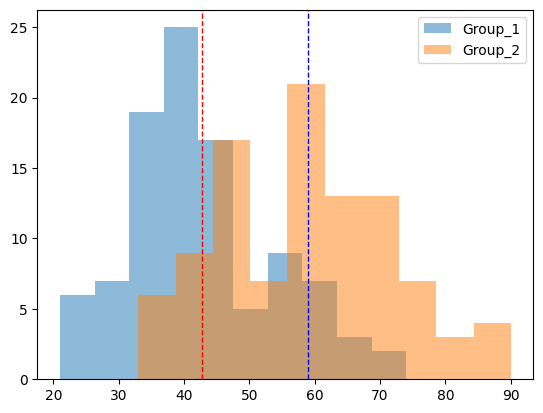

In [172]:
# Рассчитаем среднее
mean_1 = np.mean(Group_1)
mean_2 = np.mean(Group_2)

# Строим график для 1 и 2 групп
plt.hist(Group_1, alpha=0.5, label='Group_1')
plt.hist(Group_2, alpha=0.5, label='Group_2')
plt.axvline(mean_1, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_2, color='b', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.show()

Таким образом, на основе тестов p-значимости можем сделать вывод, что группа 2 показывает лучшый результат (5889 Заказов против 4277 у 1й группы на одинаковое число пользователей: 100)\
Тест оказался упешным для группы 2